In [1]:
!git clone https://github.com/nageshsinghc4/deepwrap.git
!cd deepwrap/
import os
os.chdir('/content/deepwrap/')
os.getcwd()
!pip install .

Cloning into 'deepwrap'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (277/277), done.
remote: Compressing objects: 100% (237/237), done.
remote: Total 277 (delta 39), reused 256 (delta 27), pack-reused 0
Receiving objects: 100% (277/277), 25.31 MiB | 31.04 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Processing /content/deepwrap
     |████████████████████████████████| 25.9MB 133kB/s 
     |████████████████████████████████| 983kB 46.6MB/s 
     |████████████████████████████████| 245kB 45.1MB/s 
     |████████████████████████████████| 1.1MB 52.2MB/s 
     |████████████████████████████████| 471kB 46.6MB/s 
     |████████████████████████████████| 1.1MB 44.7MB/s 
     |████████████████████████████████| 890kB 57.3MB/s 
     |████████████████████████████████| 3.0MB 47.7MB/s 
  Created wheel for DEEPWRAP: filename=DEEPWRAP-50.3.0-cp36-none-any.whl size=159940 sha256=b623da10559341d4c682d55ffd554b07b5ea68752896bece8350c49c0145c9bc
  Stored in directory: /tmp/p

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

Collect MNIST Dataset as Arrays


In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

11493376/11490434 [==============================] - 0s 0us/step


STEP 1: Preprocess Dataset


In [5]:
import pandas as pd
import deepwrap
from deepwrap import vision as vis

In [6]:
data_aug = vis.get_data_aug(  rotation_range=15,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1)
classes = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [7]:
(trn, val, preproc) = vis.images_from_array(x_train, y_train, 
                                            validation_data=None,
                                            val_pct=0.1,
                                            random_state=42,
                                            data_aug=data_aug,
                                            class_names=classes)

STEP 2: Load Model and Wrap in Learner

In [8]:
# Using a LeNet-style classifier
model = vis.image_classifier('default_cnn', trn, val)

Is Multi-Label? False
Is Regression? False
default_cnn model created.


In [9]:
learner = deepwrap.get_learner(model, train_data=trn, val_data=val, batch_size=128)

STEP 3: Find Learning Rate

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
421/421 [==============================] - 15s 35ms/step - loss: 3.1369 - accuracy: 0.1202
Epoch 2/3
421/421 [==============================] - 15s 36ms/step - loss: 0.7862 - accuracy: 0.7460
Epoch 3/3
421/421 [==============================] - 15s 37ms/step - loss: 11.7322 - accuracy: 0.8265


done.
Visually inspect loss plot and select learning rate associated with falling loss


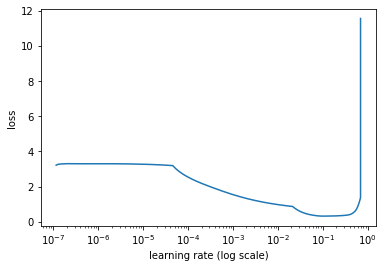

In [10]:
learner.lr_find(show_plot=True, max_epochs=3)

STEP 4: Train Model

We only train for three epochs for demonstration purposes.


In [11]:
learner.fit_onecycle(1e-3, 3)



begin training using onecycle policy with max lr of 0.001...
Epoch 1/3
422/422 [==============================] - 18s 43ms/step - loss: 0.8190 - accuracy: 0.7387 - val_loss: 0.0683 - val_accuracy: 0.9800
Epoch 2/3
422/422 [==============================] - 18s 43ms/step - loss: 0.1468 - accuracy: 0.9546 - val_loss: 0.0366 - val_accuracy: 0.9888
Epoch 3/3
422/422 [==============================] - 18s 42ms/step - loss: 0.0852 - accuracy: 0.9737 - val_loss: 0.0305 - val_accuracy: 0.9910


In [12]:
learner.validate(class_names=preproc.get_classes())

              precision    recall  f1-score   support

        zero       1.00      0.99      0.99       624
         one       1.00      1.00      1.00       654
         two       0.99      0.99      0.99       572
       three       0.99      0.99      0.99       589
        four       0.99      0.99      0.99       580
        five       0.99      0.99      0.99       551
         six       1.00      0.99      0.99       580
       seven       0.99      0.99      0.99       633
       eight       0.97      0.99      0.98       585
        nine       0.99      0.99      0.99       632

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



array([[617,   0,   1,   1,   0,   0,   1,   0,   4,   0],
       [  0, 653,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   1, 566,   1,   0,   0,   0,   1,   3,   0],
       [  0,   0,   1, 585,   0,   2,   0,   1,   0,   0],
       [  0,   0,   0,   0, 575,   0,   0,   0,   0,   5],
       [  0,   0,   0,   3,   0, 544,   1,   0,   2,   1],
       [  0,   1,   1,   0,   1,   0, 575,   0,   2,   0],
       [  0,   1,   2,   0,   1,   0,   0, 627,   2,   0],
       [  1,   0,   2,   0,   1,   1,   0,   0, 580,   0],
       [  0,   0,   0,   1,   1,   1,   0,   3,   2, 624]])

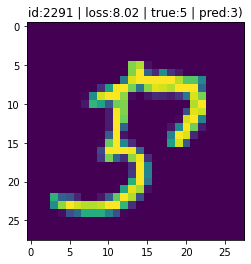

In [13]:
learner.view_top_losses(n=1)

Make Predictions

In [15]:
predictor = deepwrap.get_predictor(learner.model, preproc)

In [18]:
predictor.predict(x_test[0:1])[0]


'seven'

In [19]:
np.argmax(predictor.predict(x_test[0:1], return_proba=True)[0])


7

In [20]:
predictor.save('/tmp/my_mnist')


In [21]:
p = deepwrap.load_predictor('/tmp/my_mnist')


In [22]:
p.predict(x_test[0:1])[0]


'seven'

In [23]:
predictions = p.predict(x_test)

In [24]:
df = pd.DataFrame(zip(predictions, y_test), columns=['Predicted', 'Actual'])
df.head()

,Predicted,Actual
0,seven,7
1,two,2
2,one,1
3,zero,0
4,four,4
